In [86]:
import torch

from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits import mplot3d

from Bio import SeqIO
from torch.utils import data
from data_generator import Dataset

In [91]:
small_file = "100k_rows.fasta"
max_seq_len = 300
acids = "ACDEFGHIKLMNOPQRSTUVWY-"
dataset = Dataset(small_file, max_seq_len, acids=acids)
base_generator = data.DataLoader(dataset, batch_size=1, shuffle=False, num_workers=16)

elem_list = []
check_list = []

# Loading the entire input file into memory
for i, elem in enumerate(SeqIO.parse(small_file, "fasta")):
    if (len(elem) < max_seq_len) and not(('X' in elem) or ('B' in elem) or ('Z' in elem) or ('J' in elem)):
        elem_list.append(np.array(str(elem.seq).ljust(max_seq_len)))
        check_list.append(elem.seq)

    if len(elem_list) == 1000:
        elem_list = np.array(elem_list)
        break



In [92]:
def create_dicts(seqs, acids_str):
    count = 0
    char_to_int_dict = {}
    int_to_char_dict = {}
    cp_acids = np.copy(acids_str)
    
    for seq in seqs:
        for a in seq:
            if a in char_to_int_dict:
                continue
            else:
                char_to_int_dict[a] = count
                int_to_char_dict[count] = a
                count += 1
            if a in cp_acids:
                cp_acids = np.where(cp_acids != a)
        if cp_acids.size == 0:
            break
        
    return char_to_int_dict, int_to_char_dict



In [93]:
char_to_int_dict, int_to_char_dict = create_dicts(elem_list, acids)

check_elem_int_list = [[char_to_int_dict[a] for a in seq] for seq in check_list]
elem_int_list = np.array([[char_to_int_dict[a] for a in seq] for seq in elem_list])


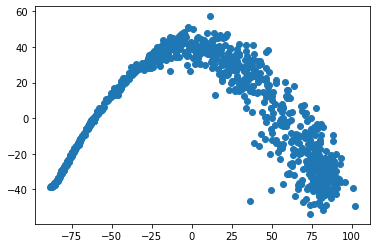

'\nfor seq in check_elem_int_list:\n    pca = PCA(n_components = 2)\n    low_dim_points = pca.fit_transform(np.array([seq]))\n    x = low_dim_points[:,0]\n    y = low_dim_points[:,1]\n    plt.scatter(x,y)\nplt.show()\n'

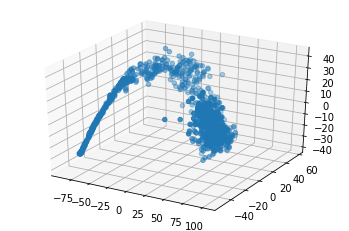

In [94]:
pca = PCA(n_components = 3)
low_dim_points = pca.fit_transform(elem_int_list)
x = low_dim_points[:,0]
y = low_dim_points[:,1]
z = low_dim_points[:,2]
plt.scatter(x,y)
plt.show()

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(x, y, z, cmap='Greens');

"""
for seq in check_elem_int_list:
    pca = PCA(n_components = 2)
    low_dim_points = pca.fit_transform(np.array([seq]))
    x = low_dim_points[:,0]
    y = low_dim_points[:,1]
    plt.scatter(x,y)
plt.show()
"""